In [64]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from skimage import feature


In [65]:
## Open the Geotiff of the image using the rasterio module:
src = rasterio.open('LeastCloudyImage.tif')
image_B12 = src.read(1)

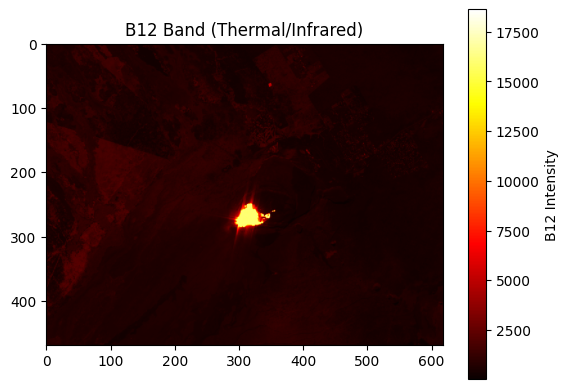

In [66]:
# Plot the image with a color map
plt.imshow(image_B12, cmap='hot')  # Some good choices: 'hot', 'inferno', 'viridis', 'gray'
plt.colorbar(label='B12 Intensity')
plt.title('B12 Band (Thermal/Infrared)')
plt.show()

(469, 618)


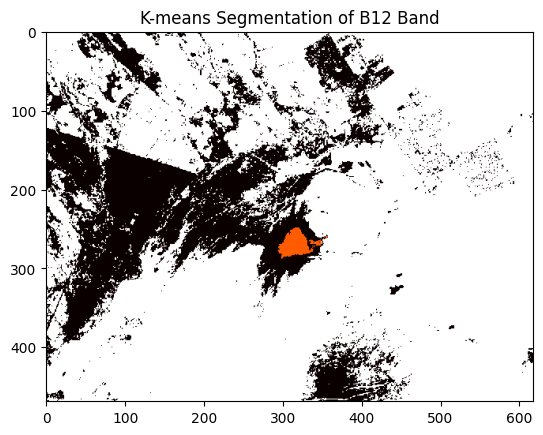

In [67]:
# Check the image shape so we can reshape appropriately
print(image_B12.shape)
nx = image_B12.shape[1]
ny = image_B12.shape[0]

B12_reshaped = image_B12.reshape(nx*ny, 1)
# Use the Kmeans function to cluster this image - here into 3 clusters:
centroid, label, inertia = k_means(B12_reshaped, n_clusters=3, n_init="auto", random_state=0)

plt.imshow(label.reshape(ny, nx, 1), cmap='hot')  # Show clusters with distinct colors
plt.title('K-means Segmentation of B12 Band')
plt.show()

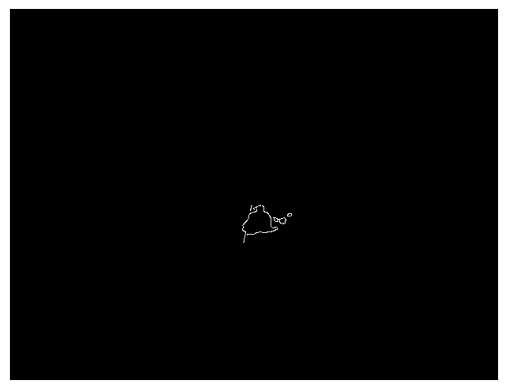

In [68]:
# Use a canny edge filter to get the edges
edges1 = feature.canny(image_B12)

# Plot the edge map
fig1 = plt.figure(1)
ax = fig1.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])

ax.imshow(edges1, cmap='gray')
plt.show()